# Description

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Data
The data & attributes information for this project is available at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

Attribute Information:
Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
#importing the pandas library
import pandas as pd
#reading the input file and storing in data
data=pd.read_csv("C:/Users/Sahana R K/Desktop/SAHANA_ML_LAB/parkison/Parkinsson disease.csv")
print(data)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5    phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6    phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7    phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8    phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9    phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10   phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11   phon_R01_S02_6       91.904       1

In [2]:
#dropping 1st column name,which is unwanted
data.drop('name',axis=1,inplace=True)

In [3]:
#print(data)

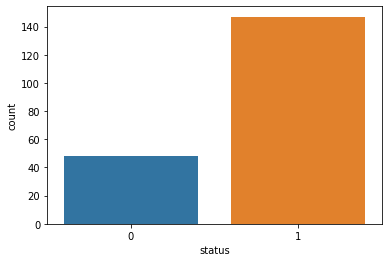

In [5]:
#DATA ANALYSIS METHOD-VISUALIZATION
#EXPLORATORY DATA ANALYSIS
import seaborn as sb
#to know the count  of values in the target we plot a count graph
sb.countplot(data['status'])

In [6]:
# splitting the concept and target 
x=data.drop('status',axis=1)
y=data.iloc[:,16]
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14       152.845       163.305        75

# we will try to eliminate some features Using RANDOMFOREST CLASSIFIER

In [7]:
#split the input data for testing and training
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y)


 Decision Trees models which are based on ensembles (eg. Extra Trees and Random Forest) can be used to rank the importance of the different features. Knowing which features our model is giving most importance can be of vital importance to understand how our model is making it’s predictions (therefore making it more explainable). 

by applying RandomForestClassifier to the input data and finding the confusion matrix and classification_report,we will able to find the which concepts hold great importance

In [8]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=130).fit(x_train,y_train)
print("time:",time.process_time() - start)
predictionforest = trainedforest.predict(x_test)
accuracyforest=trainedforest.score(x_test,y_test)
print("ACCURACY",accuracyforest)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,predictionforest))
print("CLASSIFICATION REPORT")
print(classification_report(y_test,predictionforest))

time: 0.25
ACCURACY 0.8367346938775511
CONFUSION MATRIX
[[ 8  6]
 [ 2 33]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.85      0.94      0.89        35

    accuracy                           0.84        49
   macro avg       0.82      0.76      0.78        49
weighted avg       0.83      0.84      0.83        49



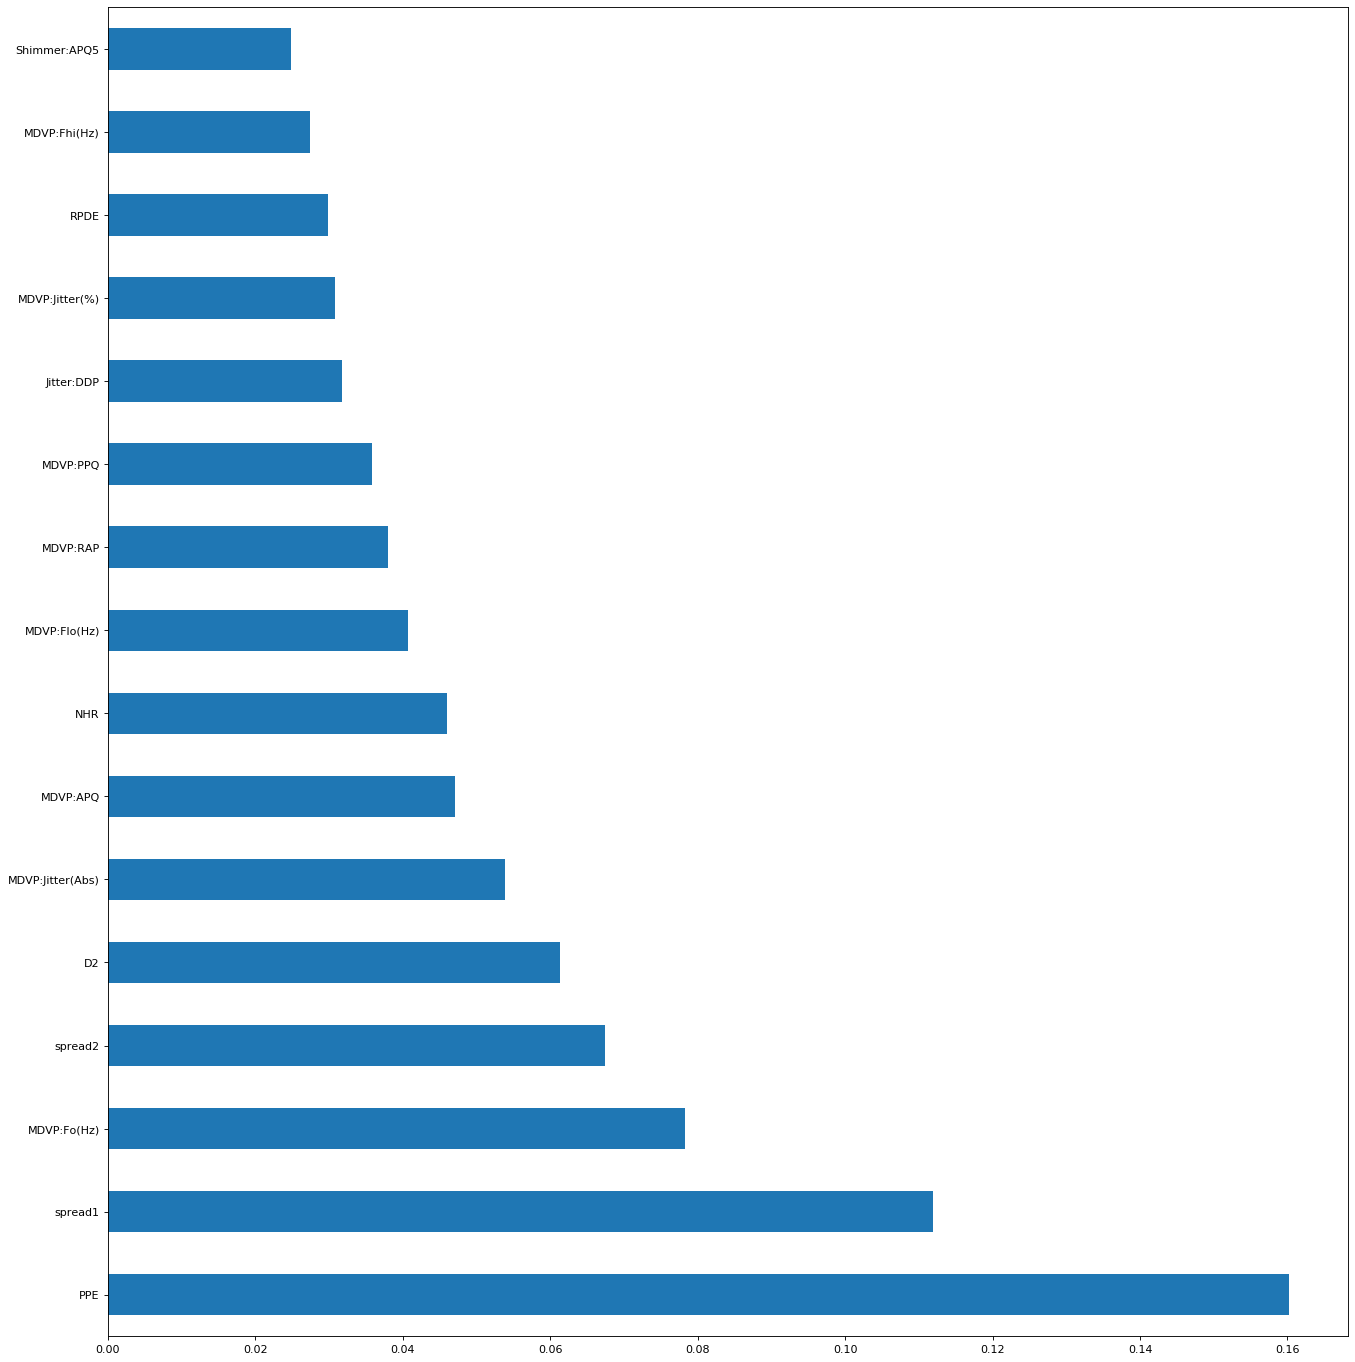

In [28]:
# we can then create a Feature Importance plot to see which features are important
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(trainedforest.feature_importances_, index= x.columns)
#out of 22 columns we will use important features i.e,16
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [34]:
# we are eliminating few features
#MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
#Shimmer:APQ5,MDVP:APQ,NHR,RPDE
#spread1,spread2,D2,PPE
#ASSIGNING 13 FEATURES TO X_NEW_FEATURES
x_new_features=data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','Shimmer:APQ5','MDVP:APQ','NHR','RPDE','spread1','spread2','D2','PPE']]

print(x_new_features)
#y is same
y_new=data.iloc[:,16]


     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14       152.845       163.305        75

# USING THE XGB CLASSIFIER
 The XGBoost stands for eXtreme Gradient Boosting, which is a boosting algorithm based on gradient boosted decision trees algorithm. XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting. 
   The xgboost.XGBClassifier is a scikit-learn API compatible class for classification.


In [35]:
#importing the XGBClassifier
from xgboost import XGBClassifier

In [36]:
#the data will be split for training and testing phase again,as we have eliminated some features
#split the input data for testing and training
from sklearn.model_selection import train_test_split as tts
x_new_train,x_new_test,y_new_train,y_new_test=tts(x_new_features,y_new,test_size=0.20)


# Defining the model


In [37]:
#creating an object
xgmodel=XGBClassifier()

# TRAINING THE DATA


In [38]:
xgmodel.fit(x_new_train,y_new_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# FINDING the training accuracy with cross-validation and k-fold methods

In [39]:
from sklearn.model_selection import cross_val_score, KFold



# MODEL1-xgmodel

In [40]:

cores = cross_val_score(xgmodel, x_new_train, y_new_train, cv=5)
print("Mean cross-validation score: %.2f" % cores.mean())
#storing the accuracy in a variable
accurac=cores.mean()

 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgmodel, x_new_train, y_new_train, cv=kfold )
##storing the accuracy in a variable
accuracy=kf_cv_scores.mean()
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


Mean cross-validation score: 0.87
K-fold CV average score: 0.90


# Predicting test data

In [41]:
y_predicted=xgmodel.predict(x_new_test)
print("THE PREDICTED  VALUES:",y_predicted)

THE PREDICTED  VALUES: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1
 1 1]


# CONFUSION MATRIX


In [42]:
from sklearn.metrics import confusion_matrix as cm
#creating an object
conf_matrix=cm(y_new_test,y_predicted)
print("CONFUSION MATRIX:")
print(conf_matrix)

CONFUSION MATRIX:
[[ 7  3]
 [ 0 29]]


# USING KNN ALGORITHM [MODEL 2]

In [43]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier()
model_KNN.fit(x_new_train,y_new_train)
#finding accuracy
accuracy1=model_KNN.score(x_new_test,y_new_test)
print('Accuracy of K – Nearest Neighbour Classifier is : ',accuracy1)
#prediction
y1_predicted=model_KNN.predict(x_new_test)
#confusion matrix
conf_matrix1=cm(y_new_test,y1_predicted)
print("CONFUSION MATRIX")
print(conf_matrix1)

Accuracy of K – Nearest Neighbour Classifier is :  0.8205128205128205
CONFUSION MATRIX
[[ 4  6]
 [ 1 28]]


# Support Vector Machine (SVM) Classifier [MODEL 3]

In [44]:
#Support Vector Machine (SVM) Classifier

from sklearn.svm import SVC
#creating object
model_svm=SVC()
#training data
model_svm.fit(x_new_train,y_new_train)
#finding accuracy
accuracy2=model_svm.score(x_new_test,y_new_test)
print("Accuracy of Support Vector Machine Classifier is :",accuracy2)
#prediction
y2_predicted=model_svm.predict(x_new_test)
#confusion matrix
conf_matrix2=cm(y_new_test,y2_predicted)
print("CONFUSION MATRIX")
print(conf_matrix2)

Accuracy of Support Vector Machine Classifier is : 0.7948717948717948
CONFUSION MATRIX
[[ 2  8]
 [ 0 29]]


E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Decision Tree Classifier [MODEL 4]

In [45]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier as dct
model_dct=dct()
model_dct.fit(x_new_train,y_new_train)
#finding accuracy
accuracy3=model_dct.score(x_new_test,y_new_test)
print("Accuracy of Support Vector Machine Classifier is :",accuracy3)
#prediction
y3_predicted=model_dct.predict(x_new_test)
#confusion matrix
conf_matrix3=cm(y_new_test,y3_predicted)
print("CONFUSION MATRIX")
print(conf_matrix3)

Accuracy of Support Vector Machine Classifier is : 0.8717948717948718
CONFUSION MATRIX
[[ 6  4]
 [ 1 28]]


#  RandomForestClassifier [MODEL-5]

In [46]:
from sklearn.ensemble import RandomForestClassifier as rfc
model_rfc=rfc()
model_rfc.fit(x_new_train,y_new_train)
#finding accuracy
accuracy4=model_rfc.score(x_new_test,y_new_test)
print("Accuracy of Support Vector Machine Classifier is :",accuracy4)
#prediction
y4_predicted=model_rfc.predict(x_new_test)
#confusion matrix
conf_matrix4=cm(y_new_test,y4_predicted)
print("CONFUSION MATRIX")
print(conf_matrix4)


Accuracy of Support Vector Machine Classifier is : 0.8717948717948718
CONFUSION MATRIX
[[ 6  4]
 [ 1 28]]


E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# AdaBoost Classifier [MODEL -6]

In [47]:
from sklearn.ensemble import AdaBoostClassifier as ada
model_ada=ada()
model_ada.fit(x_new_train,y_new_train)
#finding accuracy
accuracy5=model_ada.score(x_new_test,y_new_test)
print("Accuracy of Support Vector Machine Classifier is :",accuracy5)
#prediction
y5_predicted=model_ada.predict(x_new_test)
#confusion matrix
conf_matrix5=cm(y_new_test,y5_predicted)
print("CONFUSION MATRIX")
print(conf_matrix5)


Accuracy of Support Vector Machine Classifier is : 0.8461538461538461
CONFUSION MATRIX
[[ 7  3]
 [ 3 26]]


# BAGGING ALGORITHM [MODEL -7]


In [48]:
from sklearn.ensemble import BaggingClassifier as bc
model_bc=bc()
model_bc.fit(x_new_train,y_new_train)
#finding accuracy
accuracy6=model_bc.score(x_new_test,y_new_test)
print("Accuracy of Support Vector Machine Classifier is :",accuracy6)
#prediction
y6_predicted=model_bc.predict(x_new_test)
#confusion matrix
conf_matrix6=cm(y_new_test,y6_predicted)
print("CONFUSION MATRIX")
print(conf_matrix6)

Accuracy of Support Vector Machine Classifier is : 0.8717948717948718
CONFUSION MATRIX
[[ 7  3]
 [ 2 27]]


# AS WE HAVE USED 7 ALGORITHMS WE WILL PLOT A GRAPH TO FIND THE MOST EFFICIENT ONE

Text(0.5, 1.0, 'A Graph for comparing the accuracy obtained from various algorithm')

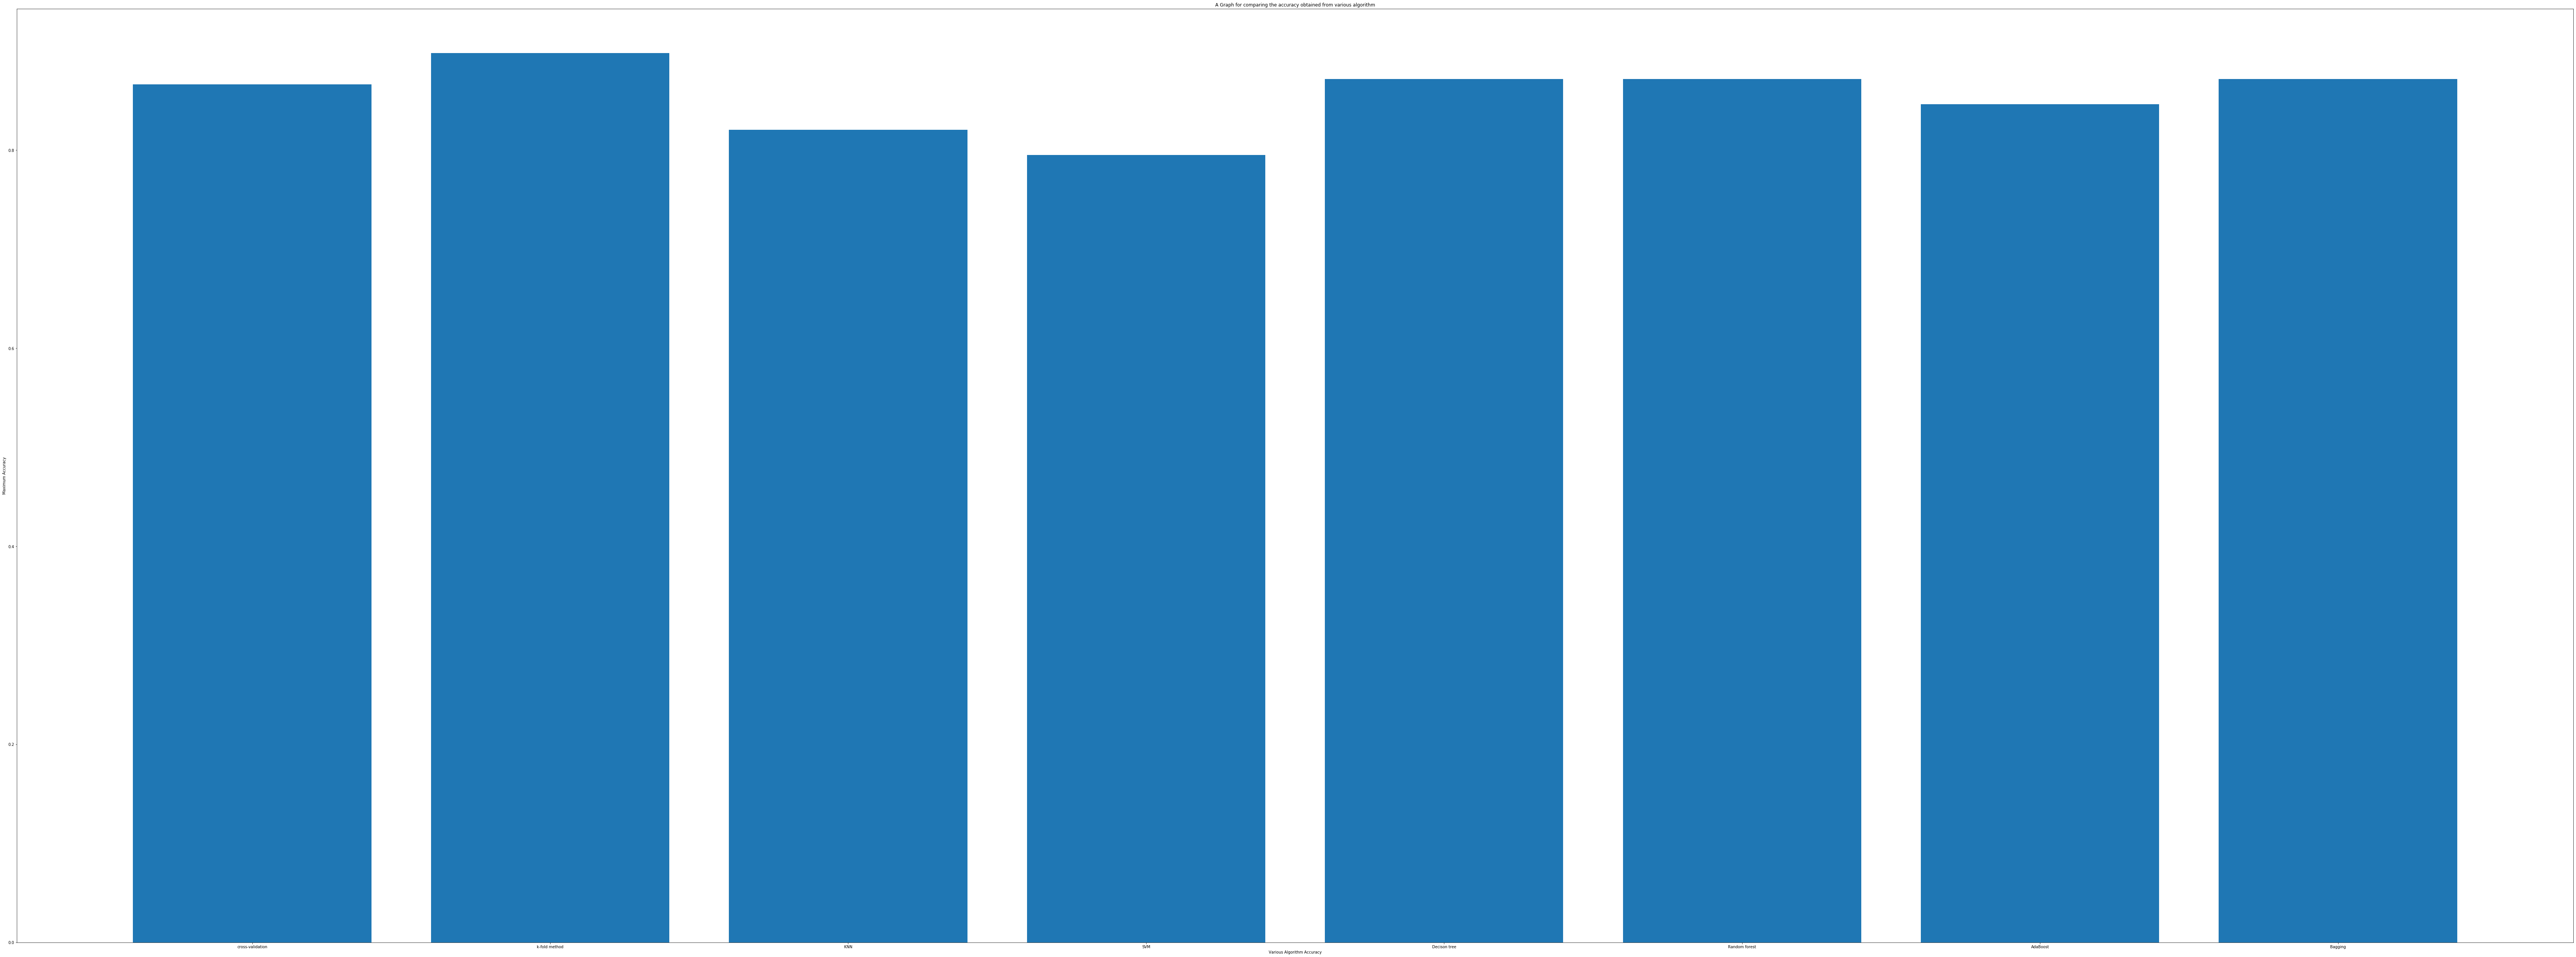

In [51]:
# importing matplotlib module  
from matplotlib import pyplot as plt  
# x-axis values  
algorithm=['cross-validation','k-fold method','KNN','SVM','Decison tree','Random forest','AdaBoost','Bagging']
y = [accurac,accuracy,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]
plt.figure(figsize=(120, 45))
plt.bar(algorithm,y)
plt.xlabel('Various Algorithm Accuracy')
plt.ylabel('Maximum Accuracy')
plt.title('A Graph for comparing the accuracy obtained from various algorithm')
# function to show the plot  
#plt.show() 


  

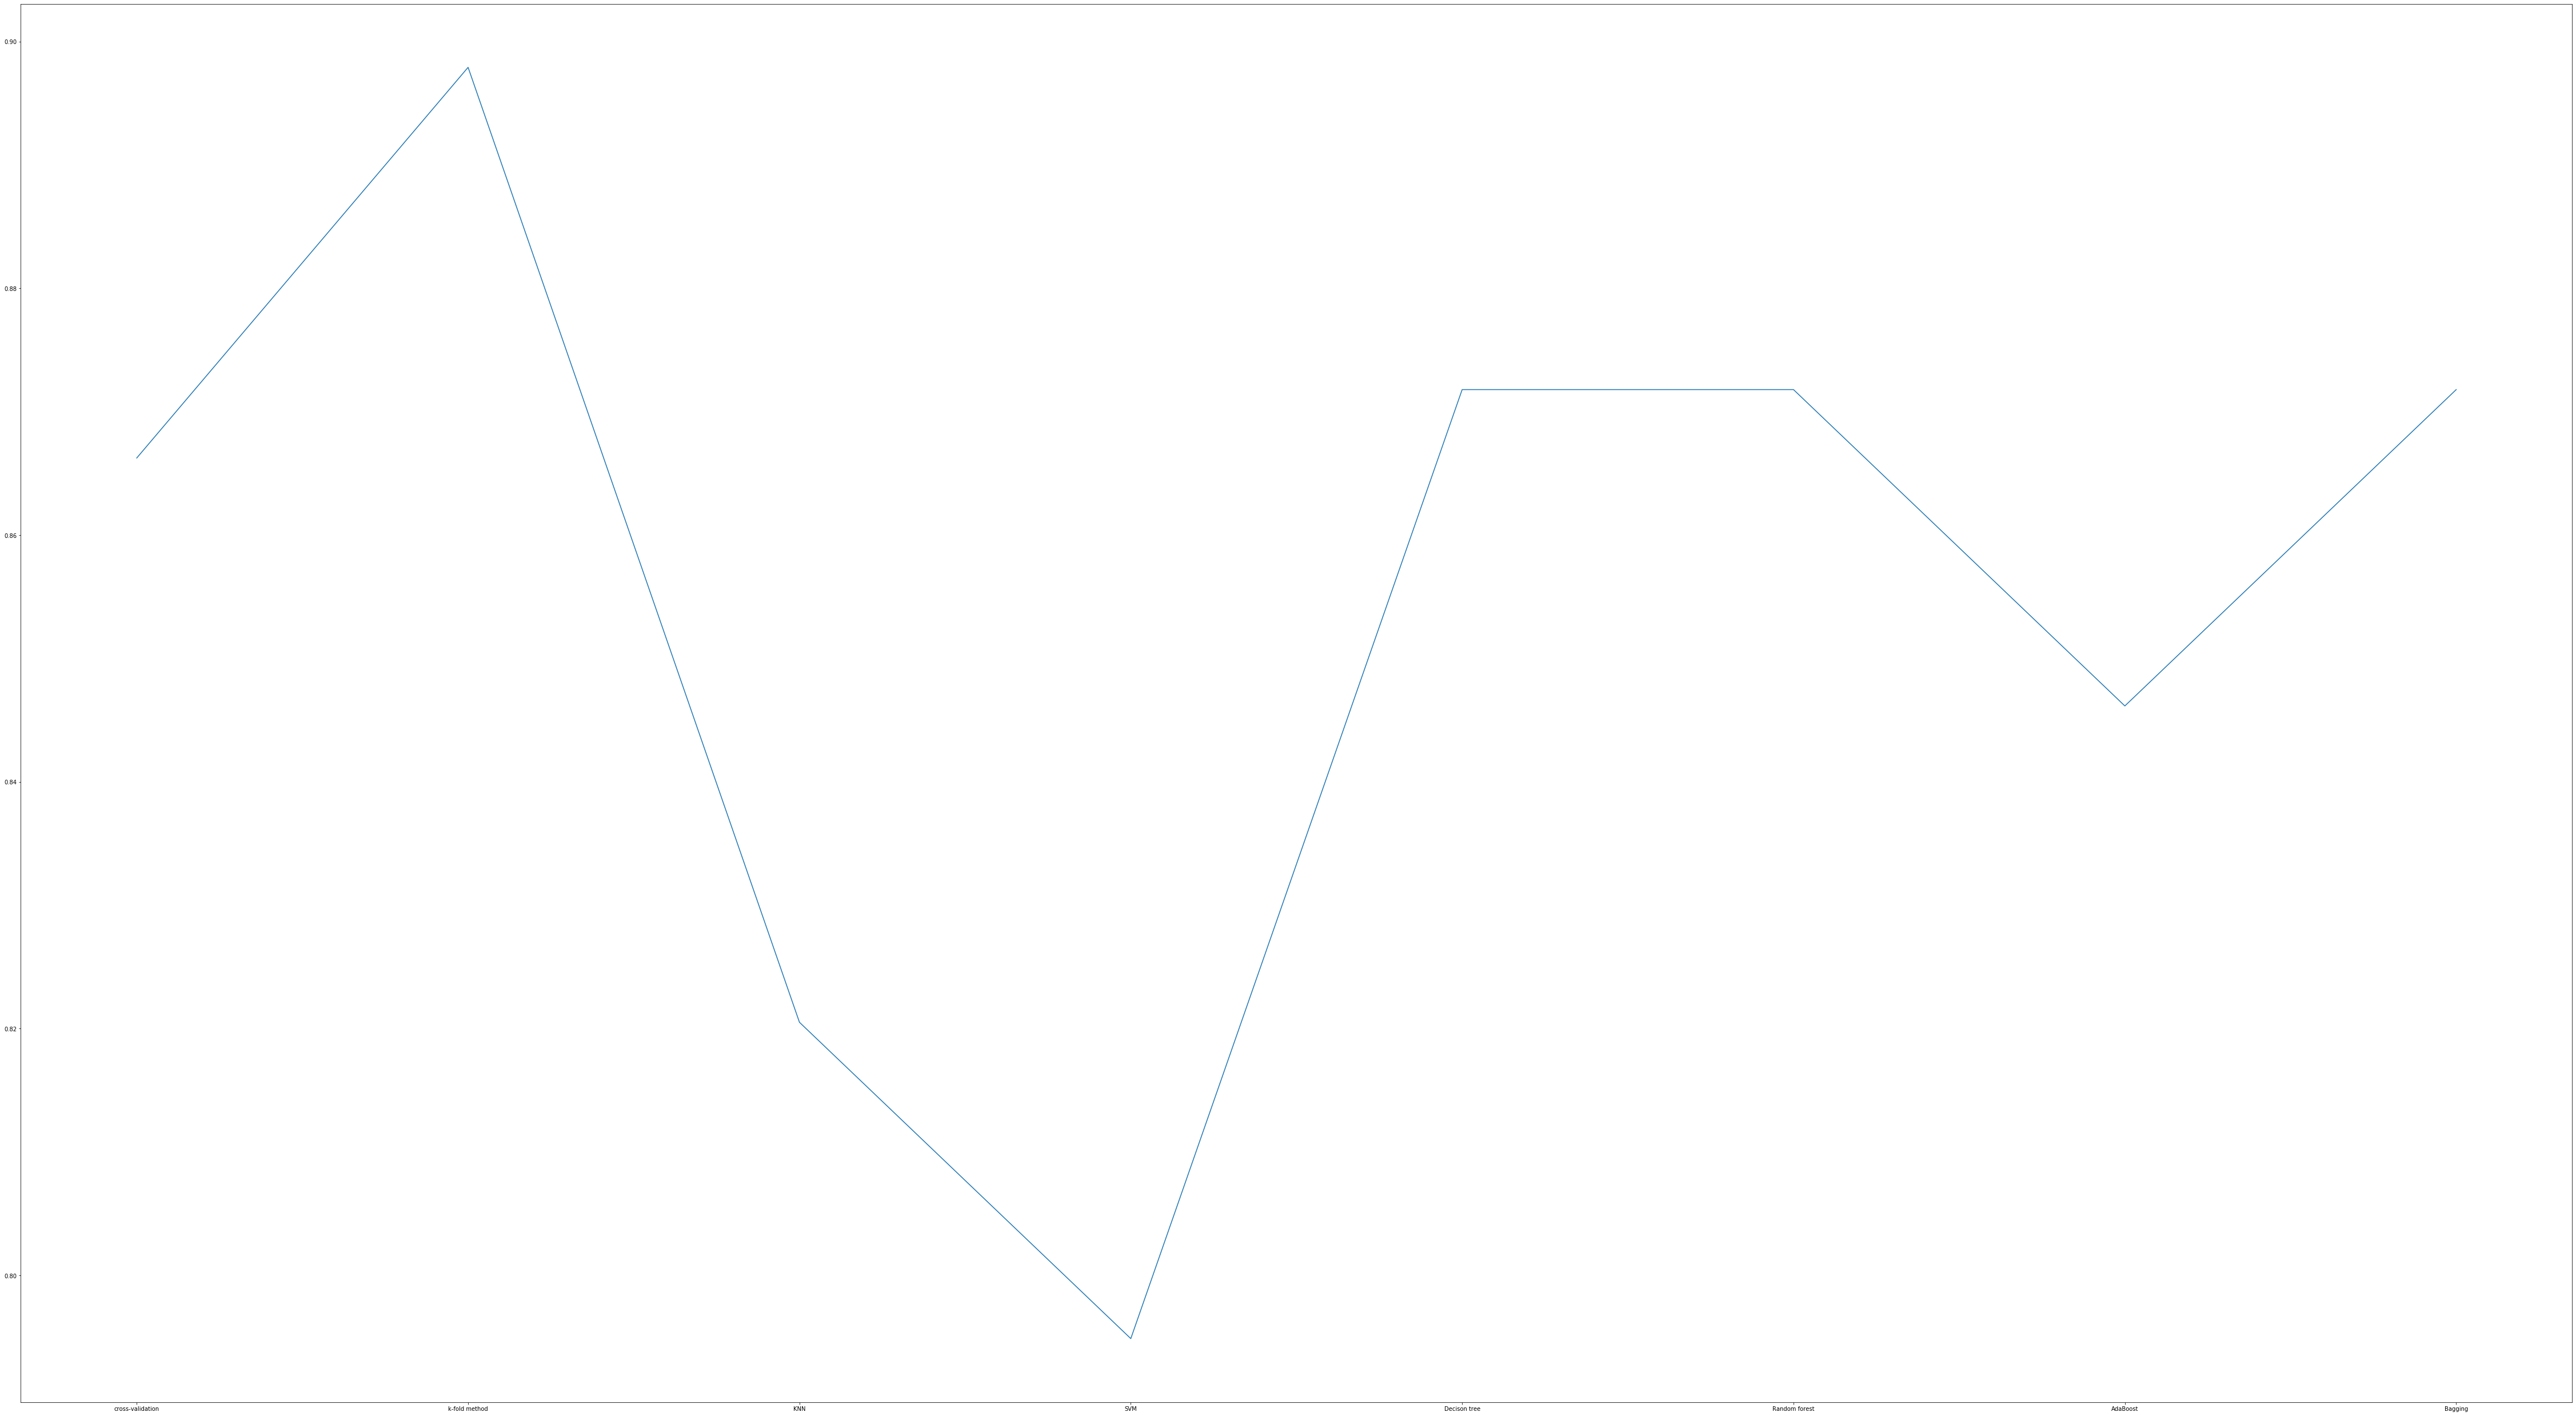

In [50]:
#ALTERNATE GRAPH
plt.figure(figsize=(80, 45))
plt.plot(algorithm,y)

# FROM THE PLOT,IT CAN BE CONCLUDED THAT XGB CLASSIFIER HAS MAXIMUM ACCURACY WHEREAS SVM ALGORITHM GIVES THE LEAST ACCURACY